In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# read data
import pandas as pd

trip_data_file = "data/trip_data_4.csv"
trip_fare_file = "data/trip_fare_4.csv"

trips = pd.read_csv(trip_data_file)
fares = pd.read_csv(trip_fare_file)

/home/ma_emali/anaconda2/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Merge the Trip and Fare data together 

In [3]:
full_tripdata = pd.merge(left=trips,right=fares, how='left', left_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'], right_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'])
full_tripdata = full_tripdata.drop_duplicates()

In [4]:
full_tripdata.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.510165e+07,1.510165e+07,1.510165e+07,1.510165e+07,1.510165e+07,1.510165e+07,1.510150e+07,1.510150e+07,1.510165e+07,1.510165e+07,1.510165e+07,1.510165e+07,1.510165e+07,1.510165e+07
mean,1.033286e+00,1.709036e+00,7.466120e+02,2.863119e+00,-7.273268e+01,4.006773e+01,-7.269042e+01,4.004676e+01,1.227533e+01,3.266793e-01,4.983180e-01,1.345724e+00,2.447328e-01,1.469078e+01
std,3.452104e-01,1.385628e+00,5.505049e+02,3.344897e+00,9.737401e+00,6.959056e+00,9.866365e+00,6.980866e+00,9.962090e+00,3.673142e-01,2.895120e-02,2.132233e+00,1.186223e+00,1.194376e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.323420e+03,-3.481141e+03,-2.771290e+03,-3.547898e+03,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,1.000000e+00,1.000000e+00,3.600000e+02,1.040000e+00,-7.399213e+01,4.073512e+01,-7.399143e+01,4.073417e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00
50%,1.000000e+00,1.000000e+00,6.000000e+02,1.780000e+00,-7.398172e+01,4.075281e+01,-7.398006e+01,4.075333e+01,9.500000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01
75%,1.000000e+00,2.000000e+00,9.600000e+02,3.200000e+00,-7.396676e+01,4.076754e+01,-7.396362e+01,4.076832e+01,1.400000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.650000e+01
max,2.100000e+02,9.000000e+00,1.080000e+04,1.000000e+02,2.228722e+03,3.210393e+03,2.228746e+03,3.577126e+03,5.000000e+02,1.500000e+01,5.000000e-01,2.000000e+02,2.000000e+01,6.281000e+02


# What is the distribution of number of passengers per trip?

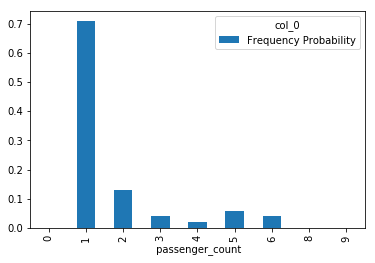

In [5]:
passengers = pd.crosstab(index=full_tripdata[" passenger_count"].astype("category"),columns="Frequency Probability",normalize='columns')
passengers.plot.bar()

# b. What is the distribution of payment_type?

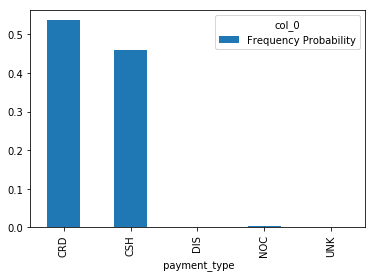

In [6]:
payment_types = pd.crosstab(index=full_tripdata[" payment_type"].astype("category"),columns="Frequency Probability",normalize='columns')
payment_types.plot.bar() 

# c. What is the distribution of fare amount?

In [7]:
full_tripdata[[" fare_amount"]].describe()

,fare_amount
count,1.510165e+07
mean,1.227533e+01
std,9.962090e+00
min,2.500000e+00
25%,6.500000e+00
50%,9.500000e+00
75%,1.400000e+01
max,5.000000e+02


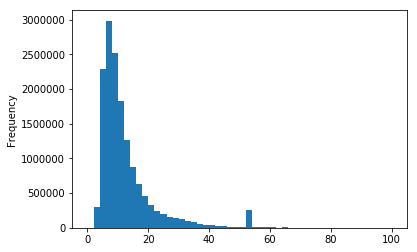

In [8]:
fare_amount = full_tripdata.iloc[:,15]
fare_amount.plot.hist(bins=50,range=(0,100))

/home/ma_emali/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


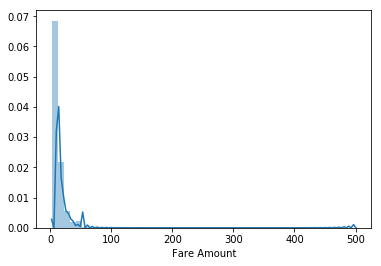

In [9]:
sns.distplot(full_tripdata[[" fare_amount"]],axlabel="Fare Amount")

# d. What is the distribution of tip amount?

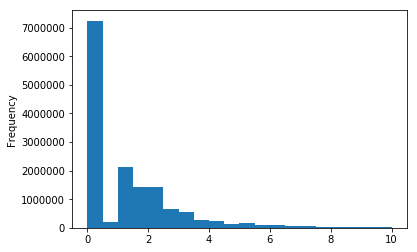

In [10]:
tips_amount = full_tripdata.iloc[:,18]
tips_amount.plot.hist(bins=20,range=(0,10))


In [11]:
full_tripdata[[" tip_amount"]].describe()

,tip_amount
count,1.510165e+07
mean,1.345724e+00
std,2.132233e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,2.000000e+02


In [12]:
#Caculate the percentage of trips without tip
notip = tips_amount.loc[(tips_amount == 0)].count()
notip
(float(len(tips_amount)-notip)) / len(tips_amount) * 100

52.18520492793834

count    7.880827e+06
mean     2.578746e+00
std      2.352112e+00
min      1.000000e-02
25%      1.250000e+00
50%      2.000000e+00
75%      3.000000e+00
max      2.000000e+02
Name:  tip_amount, dtype: float64


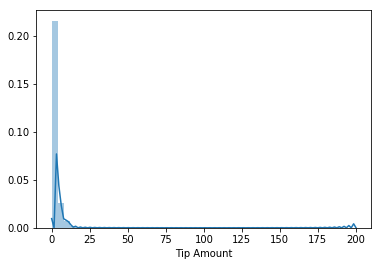

In [13]:
# plot the distribution after the zero tip trips removed 
withtip = tips_amount.loc[(tips_amount != 0)]
print withtip.describe()
sns.distplot(withtip.loc[(tips_amount != 0)],axlabel="Tip Amount")

count    7.880827e+06
mean     2.059656e+01
std      1.655893e+01
min      5.319149e-03
25%      1.666667e+01
50%      2.080000e+01
75%      2.307692e+01
max      6.360000e+03
dtype: float64

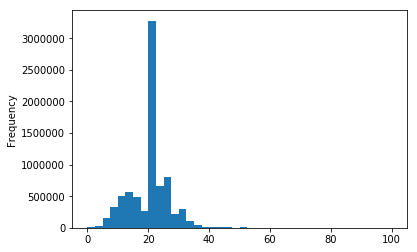

In [14]:
#caculate the percentage as tip as of trip fare
generosity = tips_amount /fare_amount * 100
generosity = generosity.loc[(generosity != 0)]
generosity.plot.hist(bins=40,range=(0,100))
generosity.describe()

# e. What is the distribution of total amount?

count    1.510165e+07
mean     1.469078e+01
std      1.194376e+01
min      2.500000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.650000e+01
max      6.281000e+02
Name:  total_amount, dtype: float64

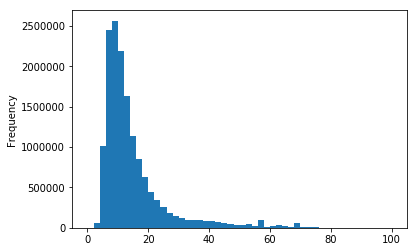

In [15]:
total_amounts = full_tripdata.iloc[:,20]
total_amounts.plot.hist(bins=50,range=(0,100))
total_amounts.describe()

# What are top 5 busiest hours of the day?

In [16]:
# set pickup time as index in dataframe, 
pickupTime = pd.DataFrame(full_tripdata.iloc[:,5])
pickupTime[" pickup_datetime"] = pd.to_datetime(pickupTime[" pickup_datetime"])
pickupTime.index = pickupTime[" pickup_datetime"]

#group by hour to list top 5 hours by count
frequency = pickupTime.groupby(pickupTime.index.hour).count()

frequency.sort_values(by=[" pickup_datetime"],ascending=False).head(5).index



Int64Index([19, 18, 20, 21, 22], dtype='int64', name=u' pickup_datetime')

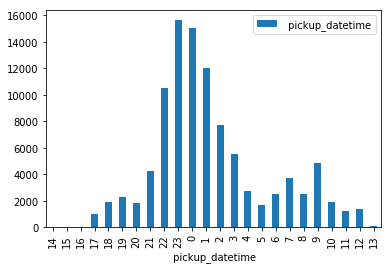

In [20]:
# reorder the index to form the near normal distribution bar chat
index = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,4,5,6,7,8,9]
frequency["new index"] = index
frequency =  frequency.sort_values(["new index"])
frequency = frequency.drop(["new index"],axis=1)
frequency.plot.bar()